### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [11]:
path = '/content/drive/MyDrive/IST707-AML/2019_Yellow_Taxi_Trip_Data.csv'
df = pd.read_csv(path)

In [17]:
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [5]:
df.shape

(10000, 18)

#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [6]:
df[['fare_amount','tip_amount','tolls_amount','total_amount']].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 4

Count the number of NAs in each column.

In [7]:
df.isna().sum()

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

In [12]:
new_df = df.drop(['vendorid',	'tpep_pickup_datetime',	'tpep_dropoff_datetime','ratecodeid','pulocationid',	'dolocationid','store_and_fwd_flag'],axis=1)


In [13]:
new_df.head()

,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,7.93,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2.00,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,1,1.36,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,1,1.00,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,1,1.96,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


array([[<Axes: xlabel='passenger_count', ylabel='passenger_count'>,
        <Axes: xlabel='trip_distance', ylabel='passenger_count'>,
        <Axes: xlabel='payment_type', ylabel='passenger_count'>,
        <Axes: xlabel='fare_amount', ylabel='passenger_count'>,
        <Axes: xlabel='extra', ylabel='passenger_count'>,
        <Axes: xlabel='mta_tax', ylabel='passenger_count'>,
        <Axes: xlabel='tip_amount', ylabel='passenger_count'>,
        <Axes: xlabel='tolls_amount', ylabel='passenger_count'>,
        <Axes: xlabel='improvement_surcharge', ylabel='passenger_count'>,
        <Axes: xlabel='total_amount', ylabel='passenger_count'>,
        <Axes: xlabel='congestion_surcharge', ylabel='passenger_count'>],
       [<Axes: xlabel='passenger_count', ylabel='trip_distance'>,
        <Axes: xlabel='trip_distance', ylabel='trip_distance'>,
        <Axes: xlabel='payment_type', ylabel='trip_distance'>,
        <Axes: xlabel='fare_amount', ylabel='trip_distance'>,
        <Axes: xlabel='

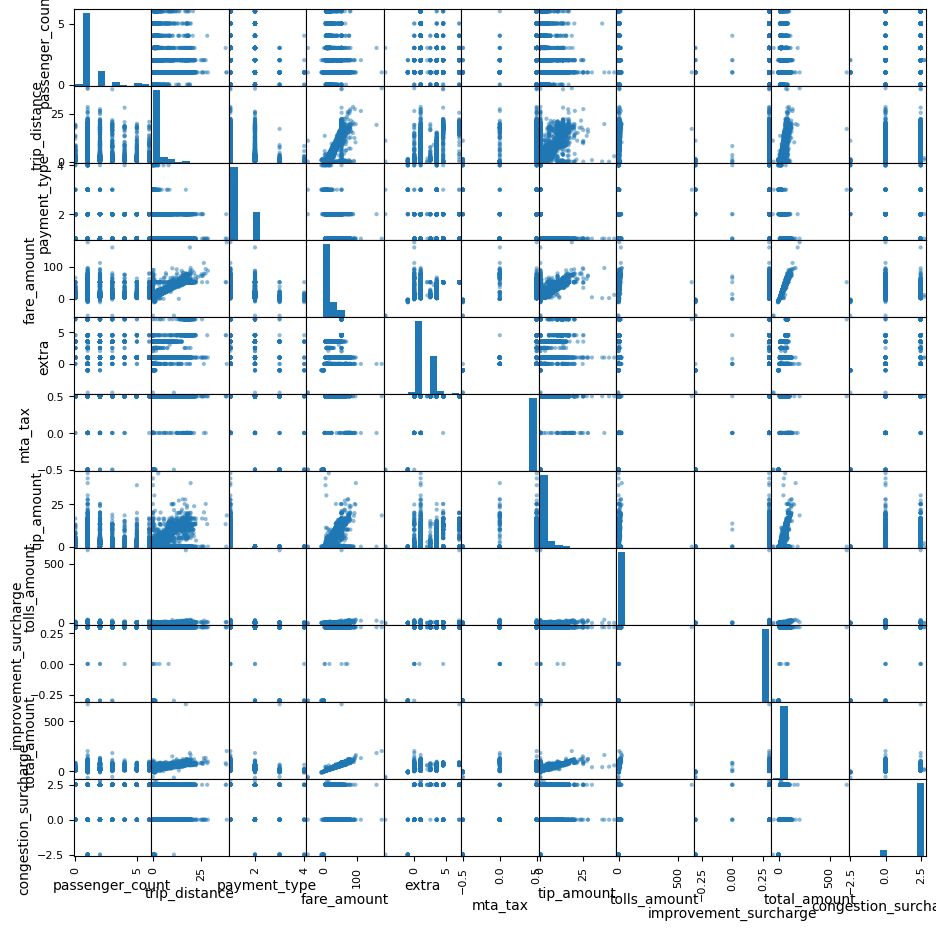

In [20]:
scatter_matrix(new_df, diagonal='hist',figsize=(11,11))

#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

(array([9.875e+03, 1.240e+02, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-65.92 ,  81.624, 229.168, 376.712, 524.256, 671.8  ]),
 <BarContainer object of 5 artists>)

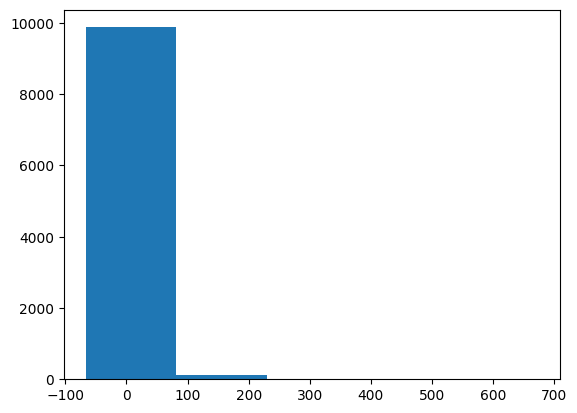

In [26]:
plt.hist(new_df['total_amount'],bins=5)

#### Exercise 7

Use a logistic regression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features.

In [32]:
X = new_df.drop(['fare_amount','total_amount','tip_amount'], axis=1)
y = new_df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model_1 = LinearRegression()

model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)



Mean Squared Error: 41.05927035340369


#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?


In [35]:
model_2 = DecisionTreeRegressor()

model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)


Mean Squared Error: 26.702783891430336
